In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import importlib

from astroLuSt.preprocessing import scaling as als

plt.style.use('astroLuSt.styles.LuSt_style')

# AxesScaler

### Generate a dataset

This dataset will contian the following:
- `nsamples` samples
- `npoints1` datapoints along first axes
- `npoints2` datapoints along second axes
- `nvals` values per cell

each sample consists of `npoints1 * npoints2 * nvals` sine curves.

Shape of design matrix: (20, 50, 2, 3)


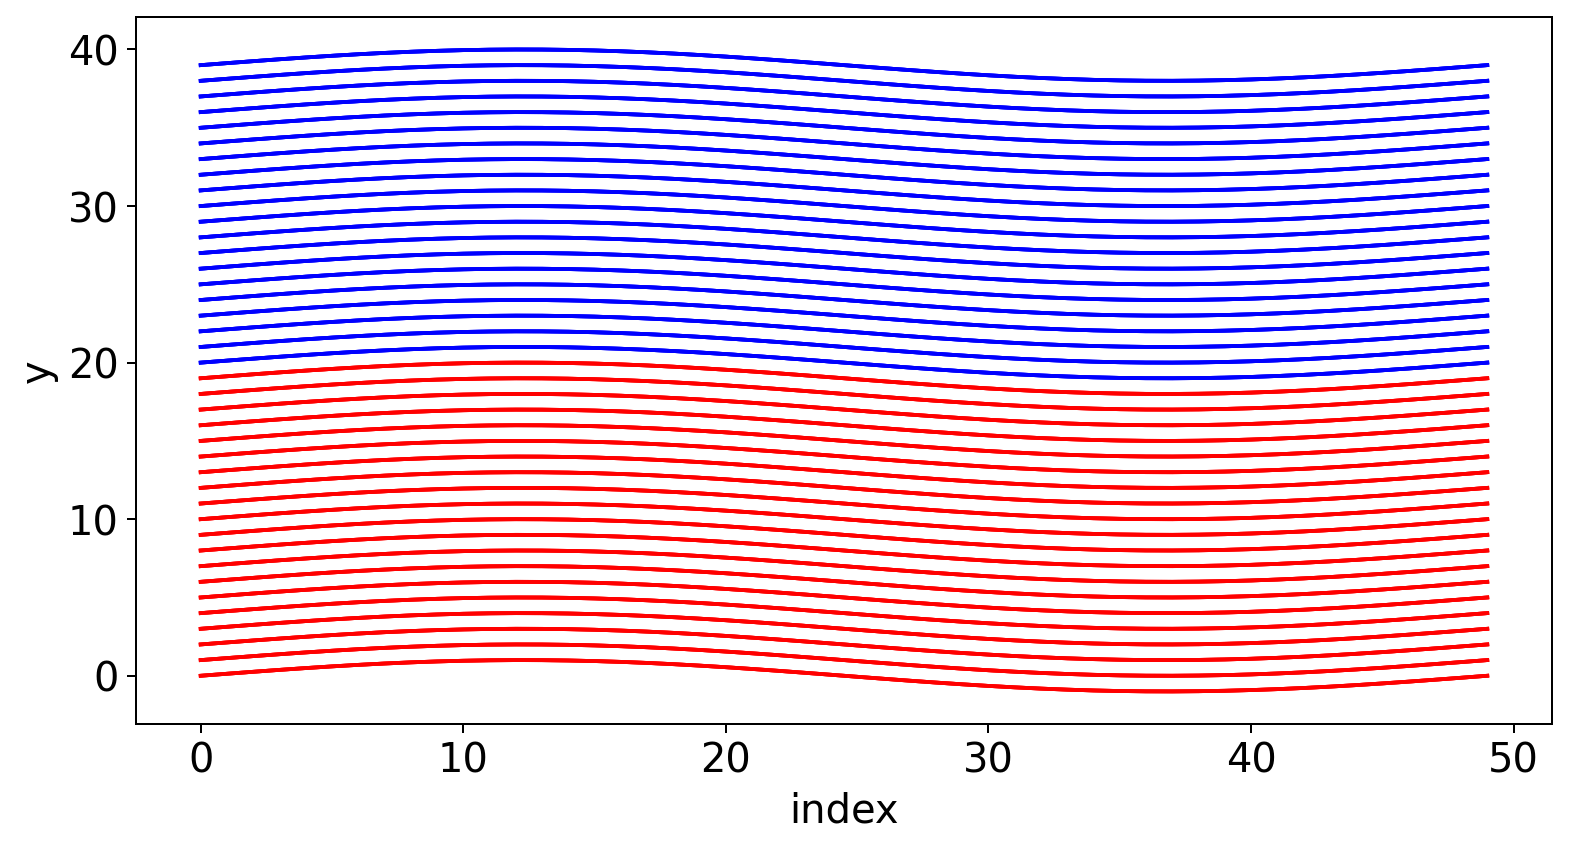

In [7]:
X = np.empty((20,50,2,3))
for i, xi in enumerate(X):
    x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1])), 2*np.pi, X.shape[1])
    shift = np.zeros_like(x_)+i
    shift[:,1,:] += X.shape[0]
    X[i] = np.sin(x_) + shift

print(f'Shape of design matrix: {X.shape}')

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

Here are multiple examples for scaling along different axes with the internal `range_scaler`.

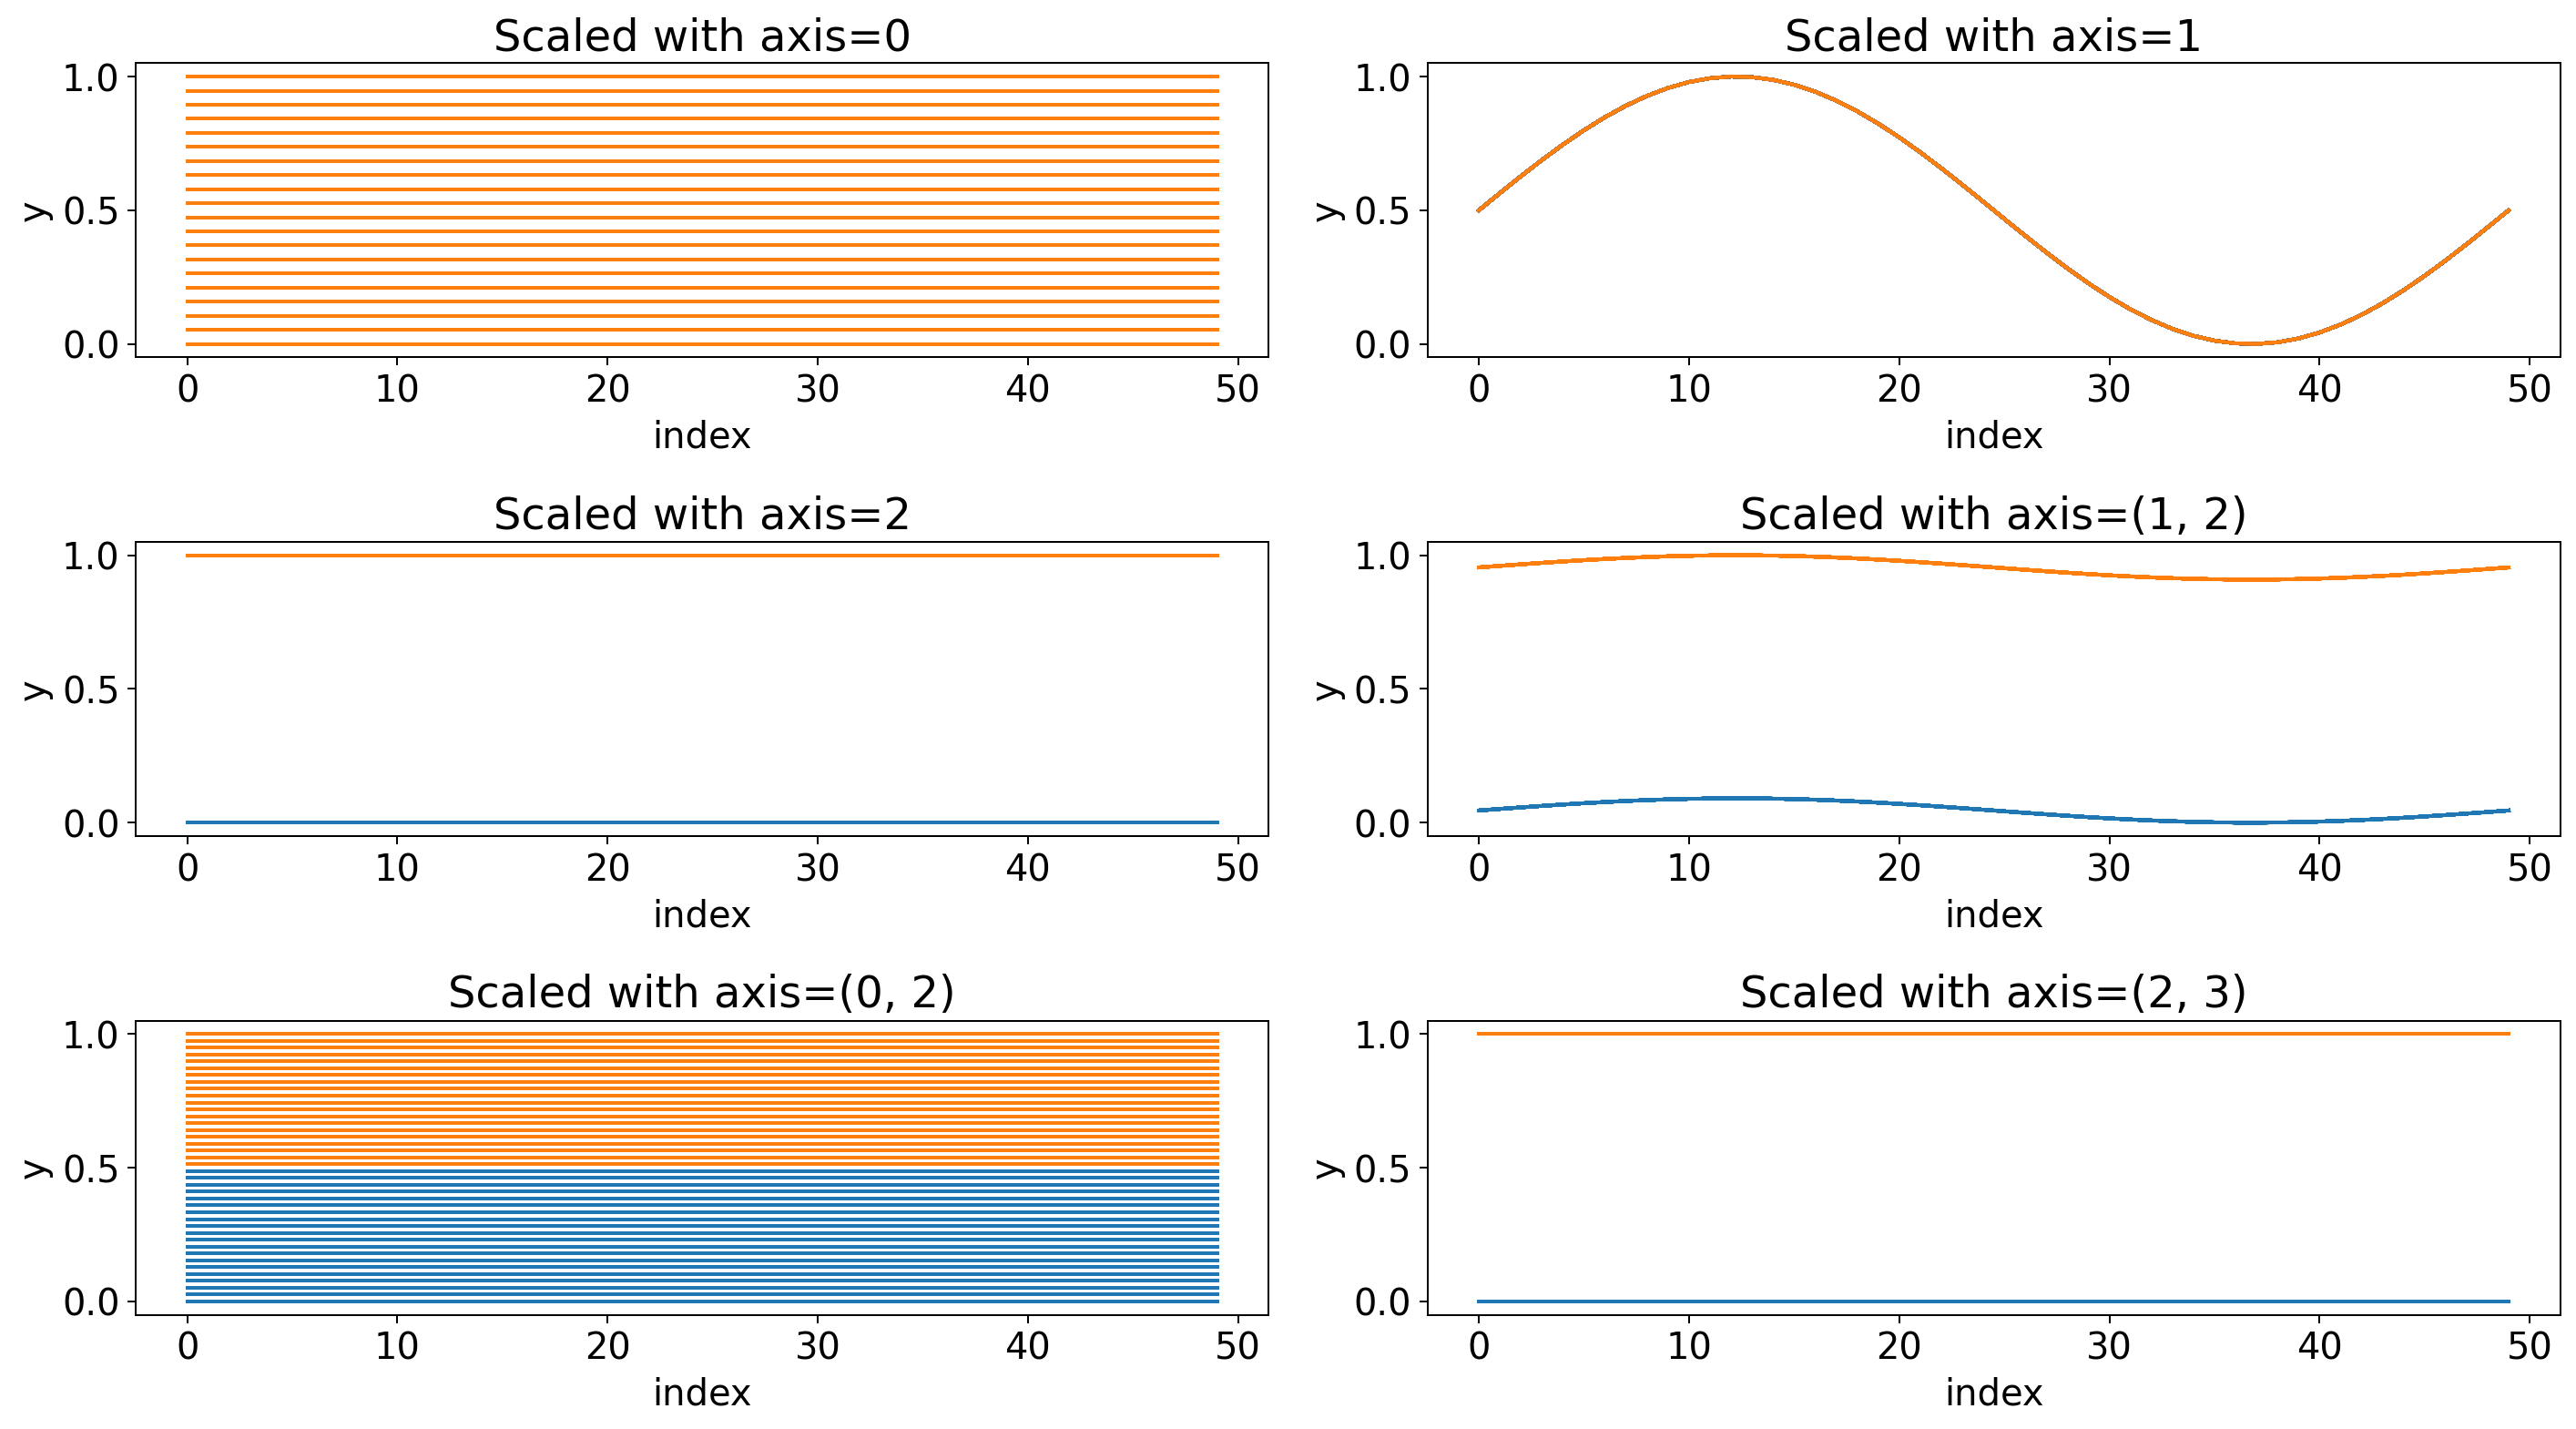

In [14]:
importlib.reload(als)

plt.rcParams['figure.figsize'] = (16,9)
axislist = [0, 1, 2, (1,2), (0,2), (2,3)]

AS = als.AxesScaler(scaler='rangescaler', axis=None)

fig = plt.figure()

for idx, axis in enumerate(axislist):
    X_scaled = AS.fit_transform(X, scaler_kwargs={'axis':axis})
    axi = fig.add_subplot(3,2,idx+1)
    axi.set_title(f'Scaled with axis={axis}')
    for x in X_scaled:
        axi.plot(x[:,0,:], color='tab:blue')
        axi.plot(x[:,1,:], color='tab:orange')
    axi.set_xlabel('index')
    axi.set_ylabel('y')
plt.tight_layout()
plt.show()